In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import seaborn as sns
sns.set_theme(style='darkgrid')

In [17]:
df = pd.read_csv('../datasets/831394006_T_ONTIME.csv', parse_dates=['FL_DATE'], dtype = {'CANCELLED': bool})\
    .drop(axis=1, labels='Unnamed: 32')
df = df[~df['CANCELLED']].drop(axis=1, labels=['CANCELLED', 'CANCELLATION_CODE']) # Filter out all cancelled flights
df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,1143.0,26.0,1142,1209.0,27.0,27.0,0.0,0.0,0.0,0.0
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,1757.0,12.0,1727,1809.0,42.0,34.0,0.0,8.0,0.0,0.0
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,2025.0,15.0,1958,2040.0,42.0,7.0,0.0,0.0,0.0,35.0
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,1744.0,5.0,1612,1749.0,97.0,77.0,0.0,20.0,0.0,0.0
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,631.0,11.0,600,642.0,42.0,0.0,0.0,42.0,0.0,0.0


### 4
How many flights each carrier operated

In [18]:
df.groupby(by='UNIQUE_CARRIER').count()['FL_NUM']

UNIQUE_CARRIER
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
F9      7598
HA      6258
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
Name: FL_NUM, dtype: int64

for each carrier compute the mean delay considering all possible reasons

In [19]:
df['total_delay'] = df[['DEP_DELAY','ARR_DELAY','CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].sum(axis=1)
df.groupby(by='UNIQUE_CARRIER').mean()['total_delay']

UNIQUE_CARRIER
AA    21.509217
AS    19.494119
B6    39.271379
DL    32.166939
EV    51.521046
F9    48.283364
HA    12.867050
NK    36.708385
OO    46.830626
UA    33.129449
VX    53.895306
WN    29.305266
Name: total_delay, dtype: float64

### 5 

Add two new columns to your DataFrame:

• weekday: it is the day of the week expressed as an integer number. Check out Pandas dayofweek
attribute.

• delaydelta: it is the difference between the arrival delay and the departure one.

In [20]:
df['weekday'] = df.FL_DATE.apply(lambda d: d.dayofweek)
df['delaydelta'] = df.ARR_DELAY - df.DEP_DELAY
df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delay,weekday,delaydelta
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,1209.0,27.0,27.0,0.0,0.0,0.0,0.0,85.0,6,-4.0
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,1809.0,42.0,34.0,0.0,8.0,0.0,0.0,118.0,6,8.0
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,2040.0,42.0,7.0,0.0,0.0,0.0,35.0,135.0,6,-9.0
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,1749.0,97.0,77.0,0.0,20.0,0.0,0.0,271.0,6,20.0
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,642.0,42.0,0.0,0.0,42.0,0.0,0.0,84.0,6,42.0


### 6

Choose one of the visualization tools that you know and inspect the arrival delay as a function of the
day of the week. Can you find any correlation?

<AxesSubplot:xlabel='weekday', ylabel='delaydelta'>

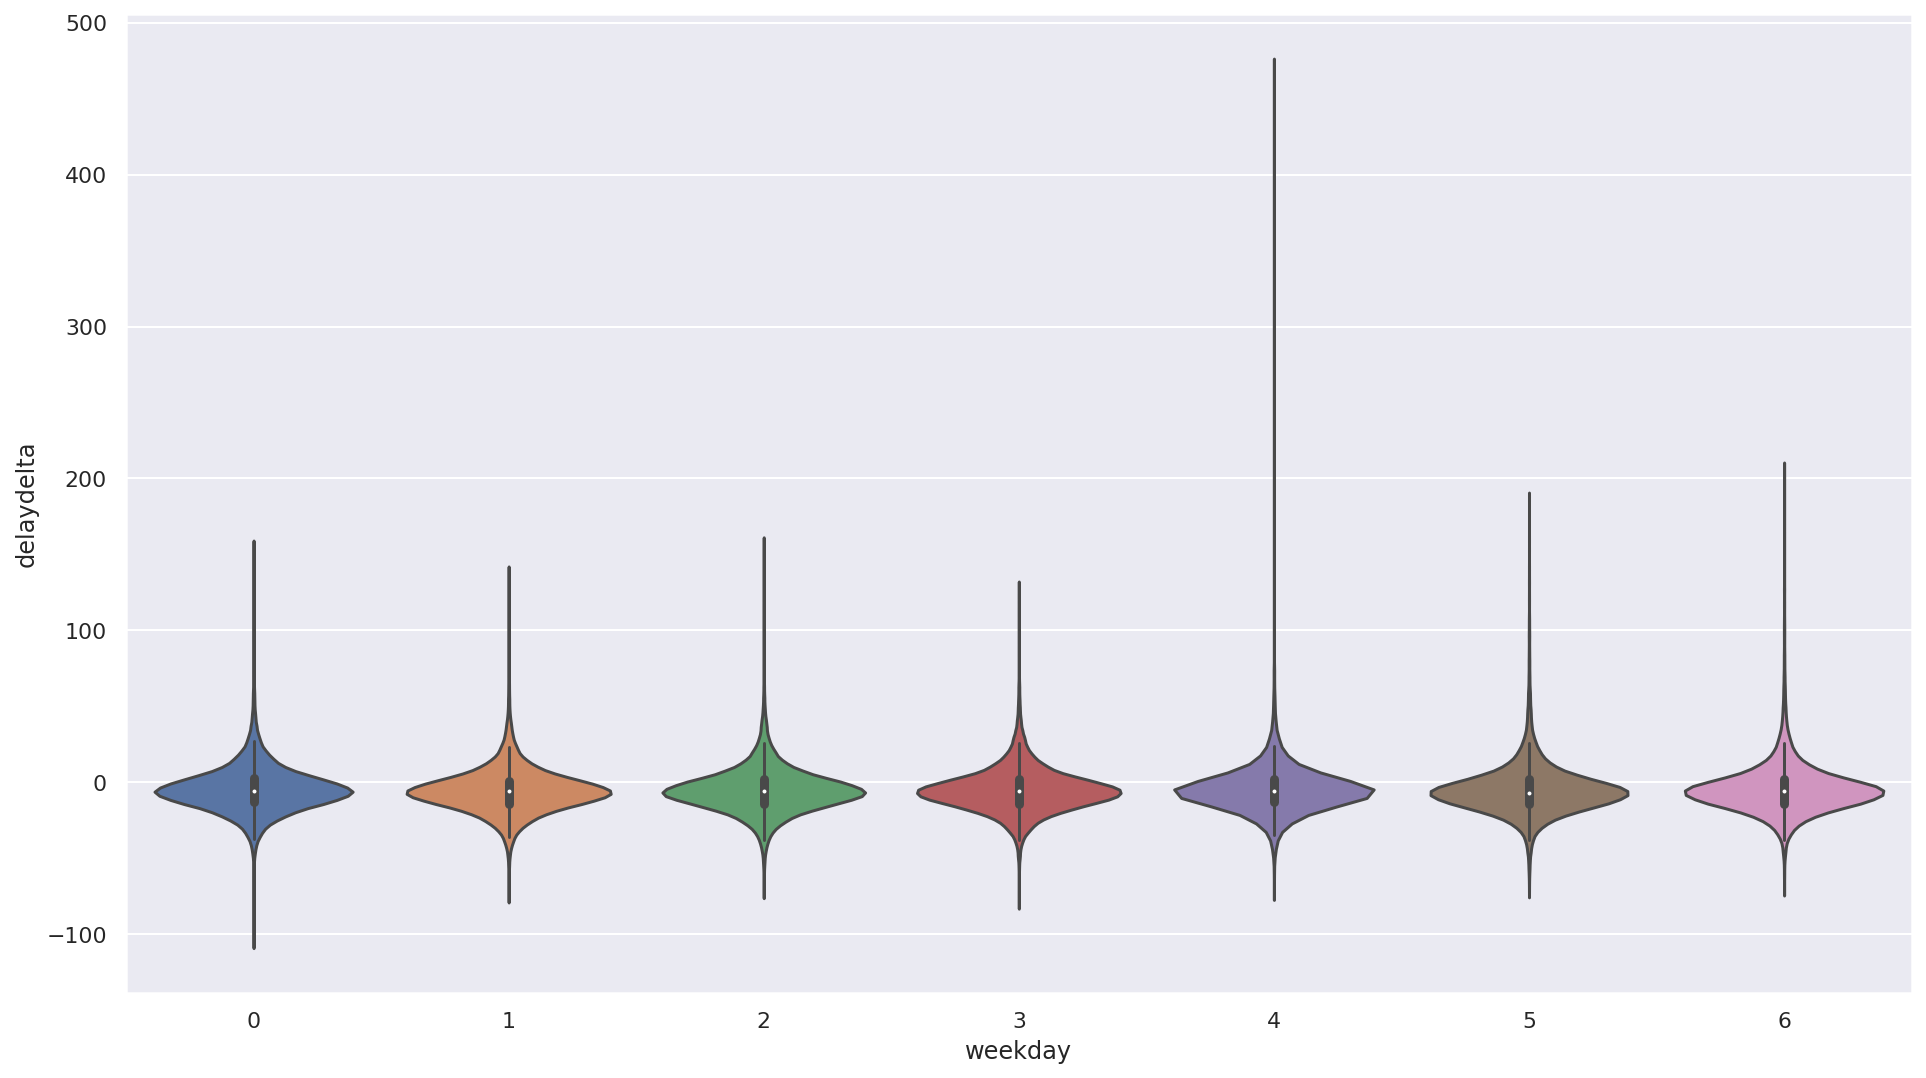

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.violinplot(data=df[['weekday', 'delaydelta']], x='weekday', y='delaydelta', ax=ax)

### 7

Consider the weekend days only, compute, for each carrier, the mean arrival delay. Now consider
the working days and compute, for each carrier, the mean arrival time.

Then, compare the delays in working days and in weekends for each company.

• Are you able to identify companies that are delayed only in weekends or only in working days?
Why?

<AxesSubplot:ylabel='UNIQUE_CARRIER'>

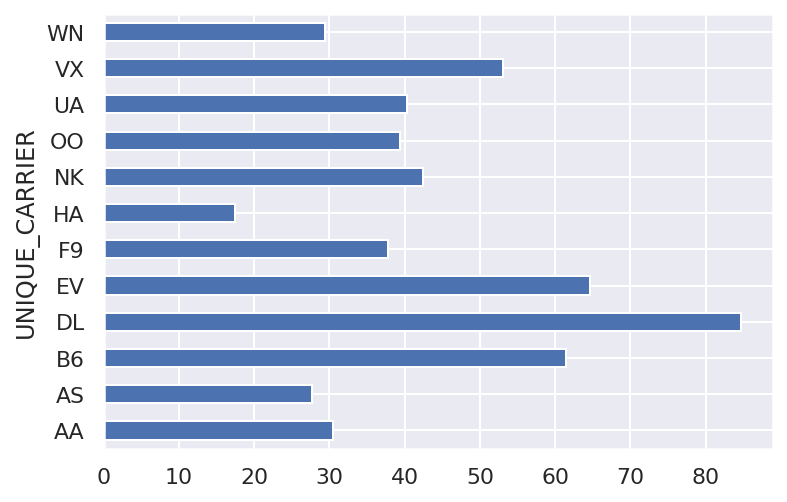

In [22]:
df[df['weekday'] >= 5].groupby('UNIQUE_CARRIER').mean()['total_delay'].plot(kind='barh')

<AxesSubplot:ylabel='UNIQUE_CARRIER'>

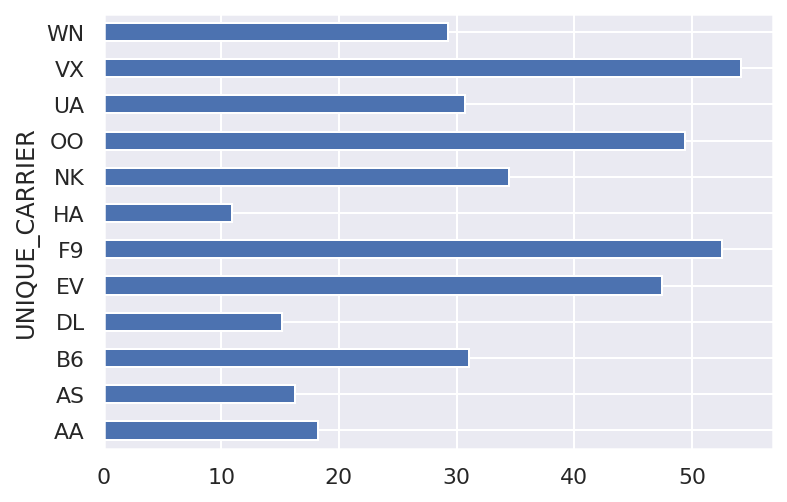

In [23]:
df[df['weekday'] < 5].groupby('UNIQUE_CARRIER').mean()['total_delay'].plot(kind='barh')

### 8

Create a Pandas DataFrame with a multi-index composed of the columns: tunique_carrier, origin,
dest, fl_date.

In [24]:
newdf = df.copy().set_index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'])
newdf

AIRLINE_ID TAIL_NUM  FL_NUM  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                   
AA             JFK    LAX  2017-01-01       19805   N787AA       1   
               LAX    JFK  2017-01-01       19805   N783AA       2   
                           2017-01-01       19805   N791AA       4   
               DFW    HNL  2017-01-01       19805   N391AA       5   
               OGG    DFW  2017-01-01       19805   N346AA       6   
...                                           ...      ...     ...   
NK             FLL    MSP  2017-01-31       20416   N625NK     596   
               MSP    FLL  2017-01-31       20416   N613NK     597   
               ATL    PHL  2017-01-31       20416   N505NK     600   
               FLL    ATL  2017-01-31       20416   N505NK     600   
                      LGA  2017-01-31       20416   N613NK     604   

                                       ORIGIN_AIRPORT_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                         
AA             JFK    LAX  2017-01-01              12478   
               LAX    JFK  2017-01-01              12892   
                           2017-01-01              12892   
               DFW    HNL  2017-01-01              11298   
               OGG    DFW  2017-01-01              13830   
...                                                  ...   
NK             FLL    MSP  2017-01-31              11697   
               MSP    FLL  2017-01-31              13487   
               ATL    PHL  2017-01-31              10397   
               FLL    ATL  2017-01-31              11697   
                      LGA  2017-01-31              11697   

                                       ORIGIN_AIRPORT_SEQ_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                             
AA             JFK    LAX  2017-01-01                1247803   
               LAX    JFK  2017-01-01                1289204   
                           2017-01-01                1289204   
               DFW    HNL  2017-01-01                1129804   
               OGG    DFW  2017-01-01                1383002   
...                                                      ...   
NK             FLL    MSP  2017-01-31                1169704   
               MSP    FLL  2017-01-31                1348702   
               ATL    PHL  2017-01-31                1039705   
               FLL    ATL  2017-01-31                1169704   
                      LGA  2017-01-31                1169704   

                                       ORIGIN_CITY_MARKET_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                             
AA             JFK    LAX  2017-01-01                  31703   
               LAX    JFK  2017-01-01                  32575   
                           2017-01-01                  32575   
               DFW    HNL  2017-01-01                  30194   
               OGG    DFW  2017-01-01                  33830   
...                                                      ...   
NK             FLL    MSP  2017-01-31                  32467   
               MSP    FLL  2017-01-31                  31650   
               ATL    PHL  2017-01-31                  30397   
               FLL    ATL  2017-01-31                  32467   
                      LGA  2017-01-31                  32467   

                                            ORIGIN_CITY_NAME  DEST_AIRPORT_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                              
AA             JFK    LAX  2017-01-01           New York, NY            12892   
               LAX    JFK  2017-01-01        Los Angeles, CA            12478   
                           2017-01-01        Los Angeles, CA            12478   
               DFW    HNL  2017-01-01  Dallas/Fort Worth, TX            12173   
               OGG    DFW  2017-01-01            Kahului, HI            11298   
...                                                      ...              ...   
NK             FLL    MSP  2017-0

### 9

For each flight operated by American Airlines (AA) and Delta Airlines (DL), taken off from the Los
Angeles International Airport (LAX) and for each date, display the departure time and delay.

In [25]:
newdf.loc[(['AA', 'DL'], 'JFK'), :][['DEP_TIME', 'DEP_DELAY']]

DEP_TIME  DEP_DELAY
UNIQUE_CARRIER ORIGIN DEST FL_DATE                        
AA             JFK    LAX  2017-01-01     831.0       31.0
                      SFO  2017-01-01     656.0       -4.0
                           2017-01-01     824.0       -1.0
                      LAX  2017-01-01     856.0       -4.0
                           2017-01-01    1922.0       22.0
...                                         ...        ...
DL             JFK    FLL  2017-01-31    1052.0      -13.0
                      BOS  2017-01-31    1953.0       28.0
                      PDX  2017-01-31    1938.0       -2.0
                      AUS  2017-01-31    1825.0        0.0
                      PHX  2017-01-31    1820.0       -5.0

[3823 rows x 2 columns]

### 10

For each flight that flew in the first week of the month, with LAX as destination airport, compute the
mean arrival delay.

In [26]:
newdf = df.copy()
newdf['wom'] = newdf['FL_DATE'].apply(lambda d: (d.day - 1) // 7)
newdf = newdf.set_index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'])
newdf.query('DEST == "LAX" and wom == 0').groupby('FL_DATE').mean()['ARR_DELAY']

FL_DATE
2017-01-01    15.589474
2017-01-02    35.678808
2017-01-03    29.456081
2017-01-04    25.408850
2017-01-05    55.772152
2017-01-06    28.660870
2017-01-07    36.690323
Name: ARR_DELAY, dtype: float64

### 11

Generate a pivot table containing the number of departed flights for each carrier and for each day
of the week and show it.
Compute now the pairwise correlation between the carriers and show it on a heatmap.

• What does this correlation matrix represent?

• Can you find any carrier with different flight plans?

In [40]:
df['wom'] = df['FL_DATE'].apply(lambda d: (d.day - 1) // 7)
df

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delay,weekday,delaydelta,wom
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,27.0,27.0,0.0,0.0,0.0,0.0,85.0,6,-4.0,0
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,42.0,34.0,0.0,8.0,0.0,0.0,118.0,6,8.0,0
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,42.0,7.0,0.0,0.0,0.0,35.0,135.0,6,-9.0,0
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,97.0,77.0,0.0,20.0,0.0,0.0,271.0,6,20.0,0
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,42.0,0.0,0.0,42.0,0.0,0.0,84.0,6,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450012,2017-01-31,NK,20416,N625NK,596,11697,1169704,32467,FLL,"Fort Lauderdale, FL",...,62.0,0.0,0.0,62.0,0.0,0.0,173.0,1,13.0,4
450013,2017-01-31,NK,20416,N613NK,597,13487,1348702,31650,MSP,"Minneapolis, MN",...,-13.0,NaN,NaN,NaN,NaN,NaN,-8.0,1,-18.0,4
450014,2017-01-31,NK,20416,N505NK,600,10397,1039705,30397,ATL,"Atlanta, GA",...,-7.0,NaN,NaN,NaN,NaN,NaN,-15.0,1,1.0,4
450015,2017-01-31,NK,20416,N505NK,600,11697,1169704,32467,FLL,"Fort Lauderdale, FL",...,-20.0,NaN,NaN,NaN,NaN,NaN,-21.0,1,-19.0,4


In [67]:
df.groupby(['UNIQUE_CARRIER', 'wom']).count().reset_index().pivot(index='UNIQUE_CARRIER', columns='wom', values='FL_DATE')

wom,0,1,2,3,4
UNIQUE_CARRIER,,,,,
AA,16458,16148,16207,16358,6981
AS,3251,3233,3266,3284,1420
B6,5255,5439,5516,5485,2382
DL,14105,16082,15827,16105,6912
EV,7820,7706,7423,7570,3359
F9,1723,1749,1740,1700,686
HA,1443,1416,1406,1403,590
NK,2611,2759,2802,2752,1205
OO,10477,10650,10884,11253,5002


<AxesSubplot:xlabel='weekday', ylabel='UNIQUE_CARRIER'>

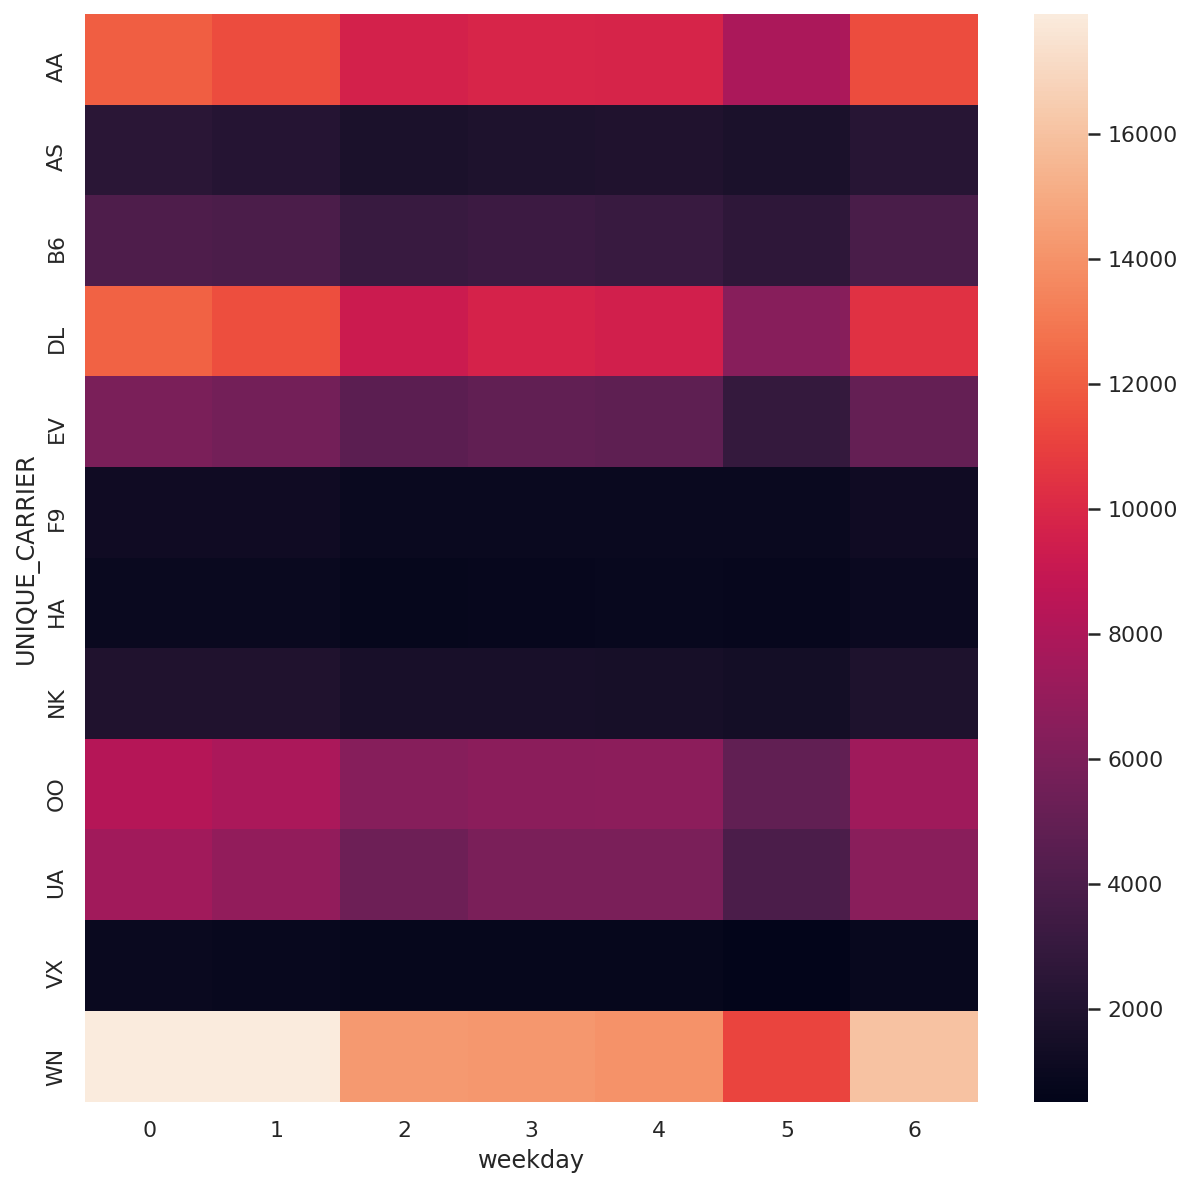

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.groupby(['UNIQUE_CARRIER', 'weekday']).count().reset_index().pivot(index='UNIQUE_CARRIER', columns='weekday', values='FL_DATE'), ax=ax)

### 12

Generate a pivot table containing the average arrival delay, for each carrier and for each day of the
week and show it.

Compute now the pairwise correlation between the carriers and show it on a heatmap.

• What does this correlation matrix represent?

• Can you find any carrier with different delay behaviors?


<AxesSubplot:xlabel='weekday', ylabel='UNIQUE_CARRIER'>

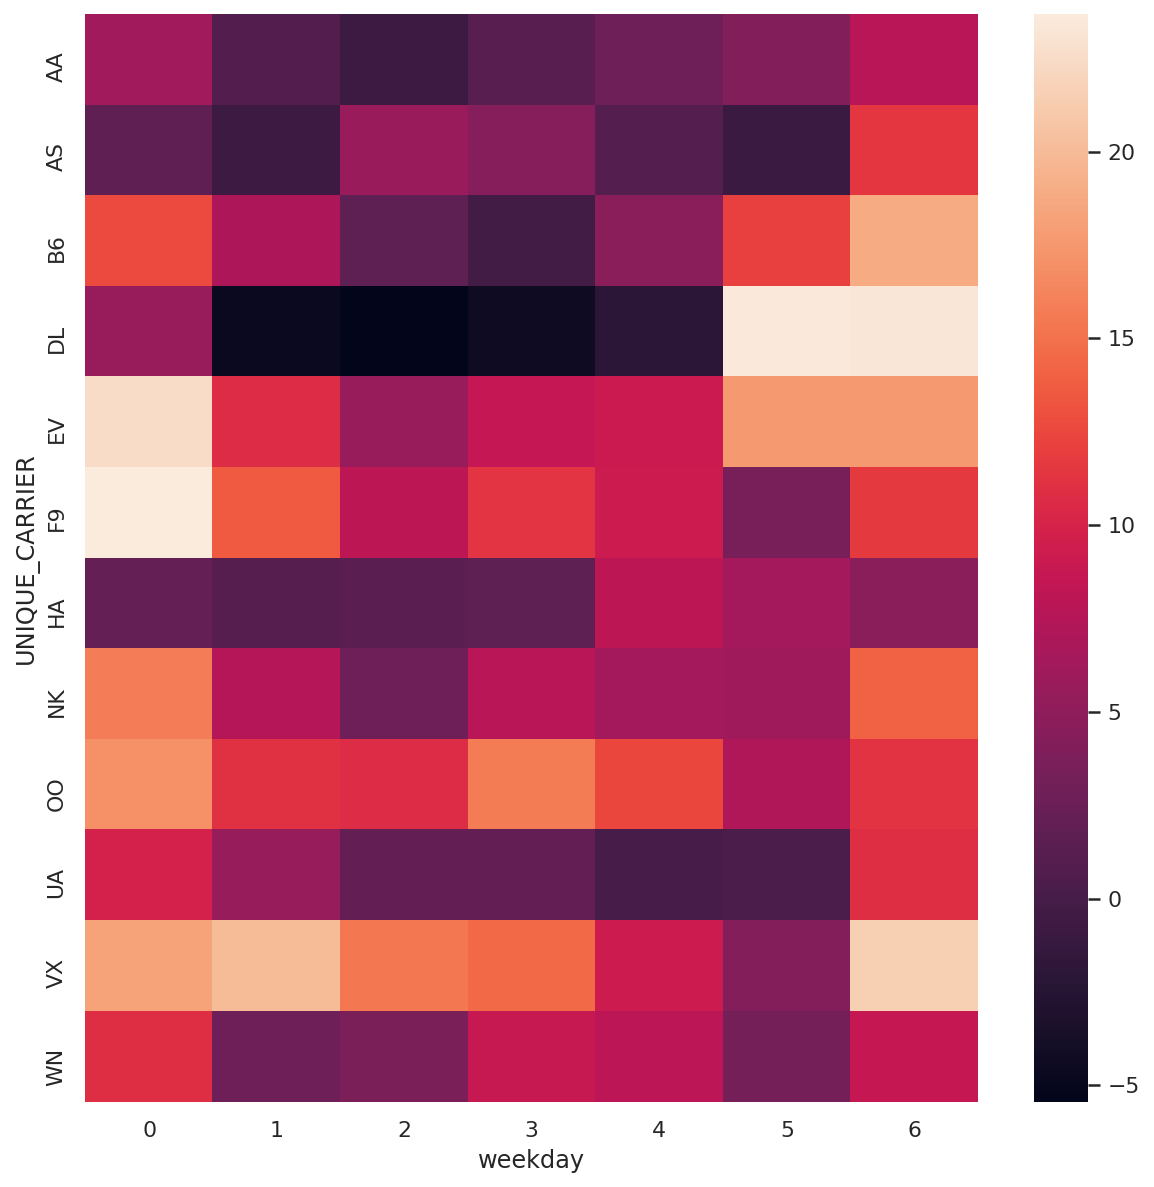

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.groupby(['UNIQUE_CARRIER', 'weekday']).mean().reset_index().pivot(index='UNIQUE_CARRIER', columns='weekday', values='ARR_DELAY'), ax=ax)

### 13

Using a pivot table, for the carriers HA, DL, AA and AS compute the average deltadelay for each
day of the week. Then, display the results on a line plot, having a line per carrier and the weekday
on the x-axis.

In [90]:
df.query('UNIQUE_CARRIER in ["HA", "DL", "AA", "AS"]').groupby(['weekday', 'UNIQUE_CARRIER']).mean()['delaydelta'].unstack()

UNIQUE_CARRIER,AA,AS,DL,HA
weekday,,,,
0,-3.576209,-1.690789,-8.913563,0.258359
1,-4.621619,-1.625446,-10.211625,0.307772
2,-4.601184,-1.889198,-10.544913,0.759189
3,-4.091436,-2.130705,-10.604603,0.390762
4,-3.553686,-2.624551,-9.623199,0.746528
5,-4.558771,-3.453872,-5.979988,1.330508
6,-3.747053,0.542632,-7.001644,1.207066


In [ ]:
sns.lineplot

<AxesSubplot:xlabel='weekday'>

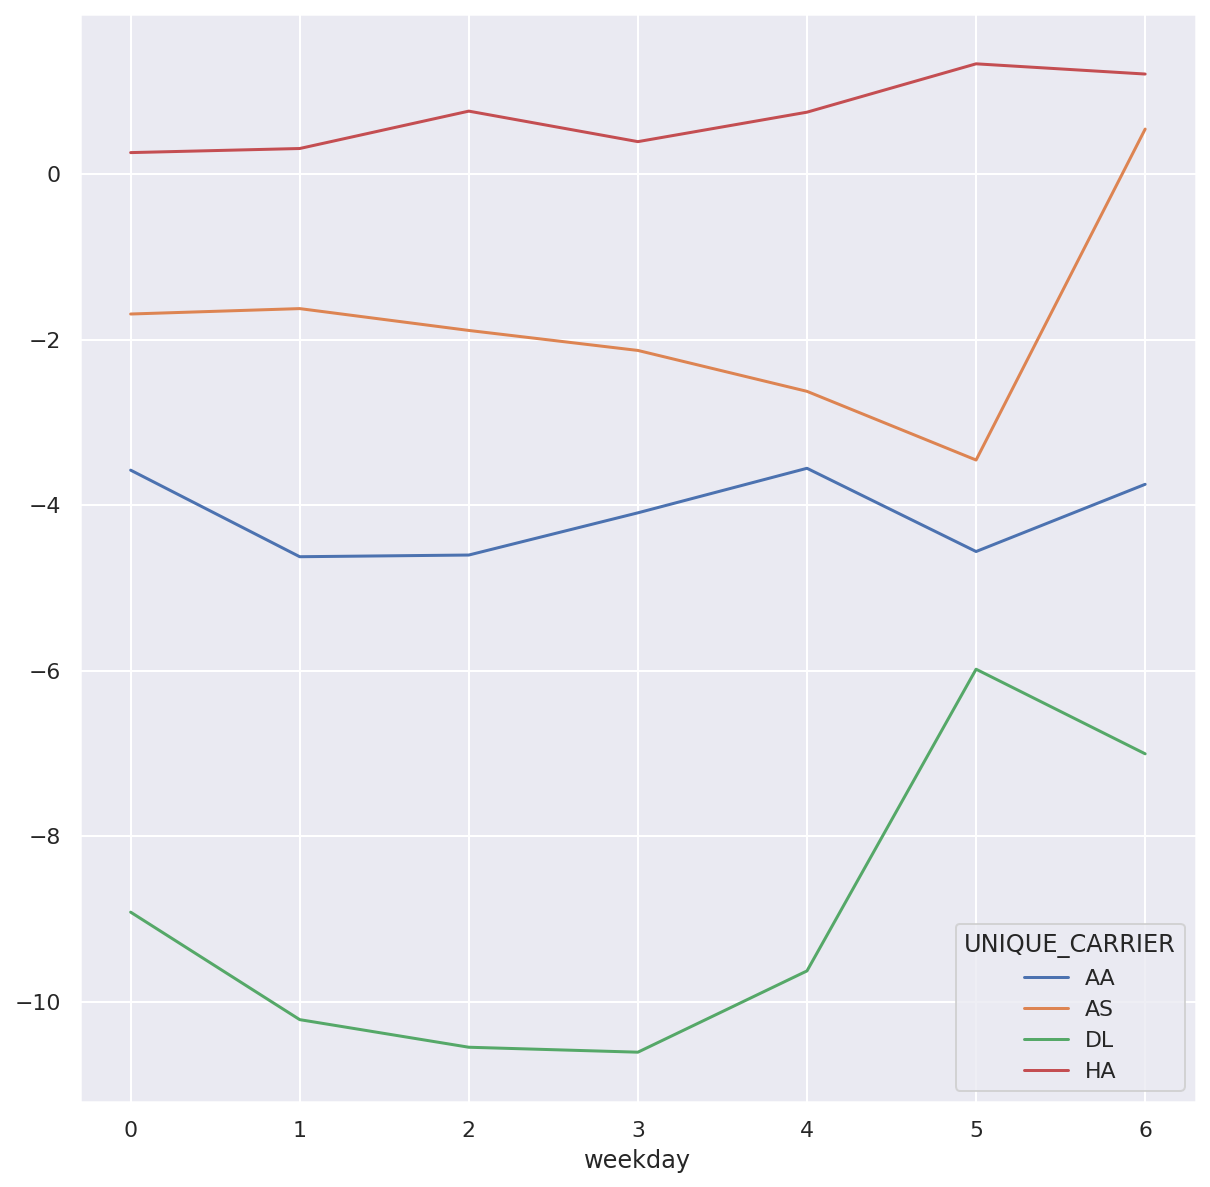

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
df.query('UNIQUE_CARRIER in ["HA", "DL", "AA", "AS"]').groupby(['weekday', 'UNIQUE_CARRIER']).mean()['delaydelta'].unstack().plot(ax=ax)